In [31]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
star_df = pd.read_csv('https://drive.google.com/uc?id=1BQVc6MHjQFtDC9iP1isT_K4ojVe_Oil-')
star_df.sample(10)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
4,1939,0.000138,0.1030,20.060,0,Red,M
0,3068,0.002400,0.1700,16.120,0,Red,M
192,2994,0.007200,0.2800,13.450,1,Red,M
11,3129,0.012200,0.3761,11.790,1,Red,M
64,2935,0.000140,0.1160,18.890,0,Red,M
205,19920,0.001560,0.0142,11.340,2,Blue,B
116,4015,282000.000000,1534.0000,-11.390,5,Red,K
216,9320,29.000000,1.9100,1.236,3,Blue-White,A
232,32489,648430.000000,1948.5000,-10.840,5,Blue,O
125,3225,0.000760,0.1210,19.630,0,Red,M


In [33]:
star_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


In [34]:
folder_name = 'star_plots'
os.makedirs(folder_name, exist_ok=True)
base_dir = f'./{folder_name}/'


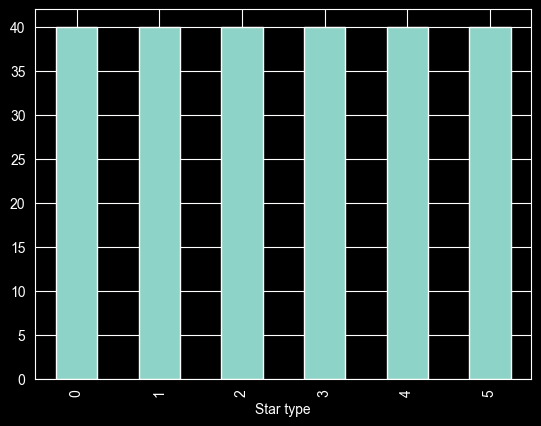

In [35]:
# Bar chart to visualize the count of stars with respective type
star_df['Star type'].value_counts().plot(kind='bar')
plt.show()

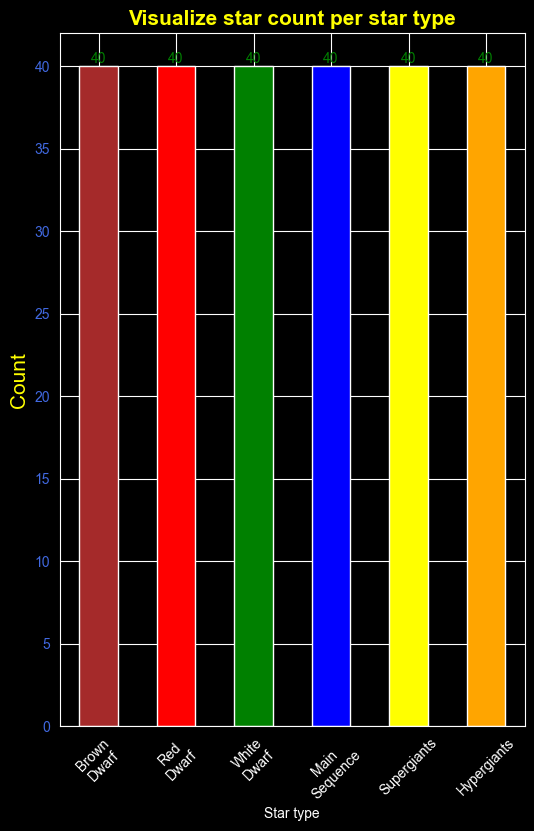

In [36]:
star_types = ['Brown\nDwarf', 'Red\nDwarf', 'White\nDwarf', 'Main\nSequence','Supergiants','Hypergiants']
plt.figure(figsize=(6,9))
plt.style.use('dark_background')
ax = star_df['Star type'].value_counts().plot(kind='bar', color=['brown','red','green','blue','yellow','orange'])
ax.bar_label(ax.containers[0], color='green')
plt.title('Visualize star count per star type', fontsize=15, color='yellow', weight='bold')
plt.yticks(color='royalblue')
plt.ylabel('Count', fontsize=15,color='yellow')
plt.xticks(ticks=[0,1,2,3,4,5],labels=star_types, rotation=45,fontsize=10)
plt.savefig(base_dir+'barplot_star_counts.png')
plt.show()



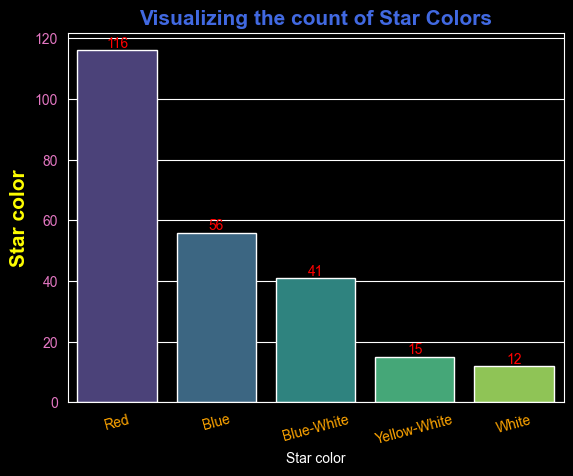

In [69]:
# Bar chart but with Seaborn + Matplotlib
x=star_df['Star color'].value_counts().index
y=star_df['Star color'].value_counts()
ax = sns.barplot(x=x, y=y,
            palette='viridis',
            hue=x,
            legend=False)
for container in ax.containers:
    ax.bar_label(container, color='red')
    
plt.title("Visualizing the count of Star Colors",color="royalblue", fontsize=15, weight='bold')
plt.xticks(rotation=15,color='orange')
plt.ylabel('Star color',color='yellow', weight='bold', fontsize=15)
plt.yticks(color='tab:pink')
plt.savefig(base_dir + 'star_colors.png')
plt.show()

In [71]:
star_df.head(5)



,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


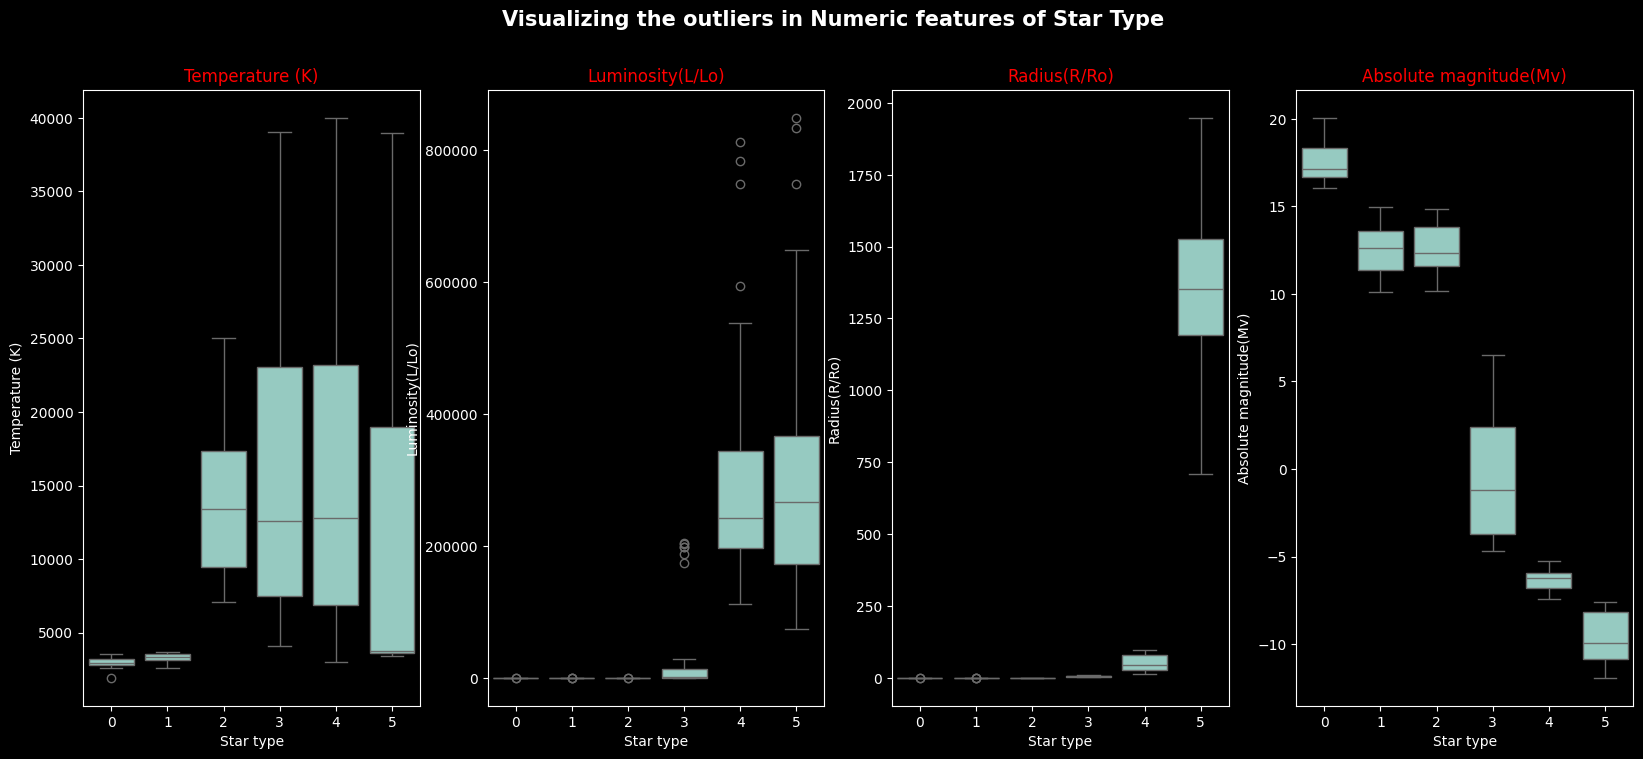

In [105]:
# boxplot
plt.figure(figsize=(20,8))
plt.suptitle('Visualizing the outliers in Numeric features of Star Type', color='white',weight='bold',fontsize='15')
plt.style.use('dark_background')
for i in range(4):
    plt.subplot(1,4,i+1)
    sns.boxplot(x=star_df['Star type'], y=star_df.iloc[:,i])
    plt.title(star_df.columns[i], color='red')
plt.savefig(base_dir + 'boxplot_star_type.png')

In [133]:
def line_subplot(star_df, colors, i):
    plt.subplot(4,1,i+1)
    plt.plot(star_df.iloc[:,i], color=colors[i])
    plt.title(star_df.columns[i], color='lightblue', fontsize=10, weight='bold')

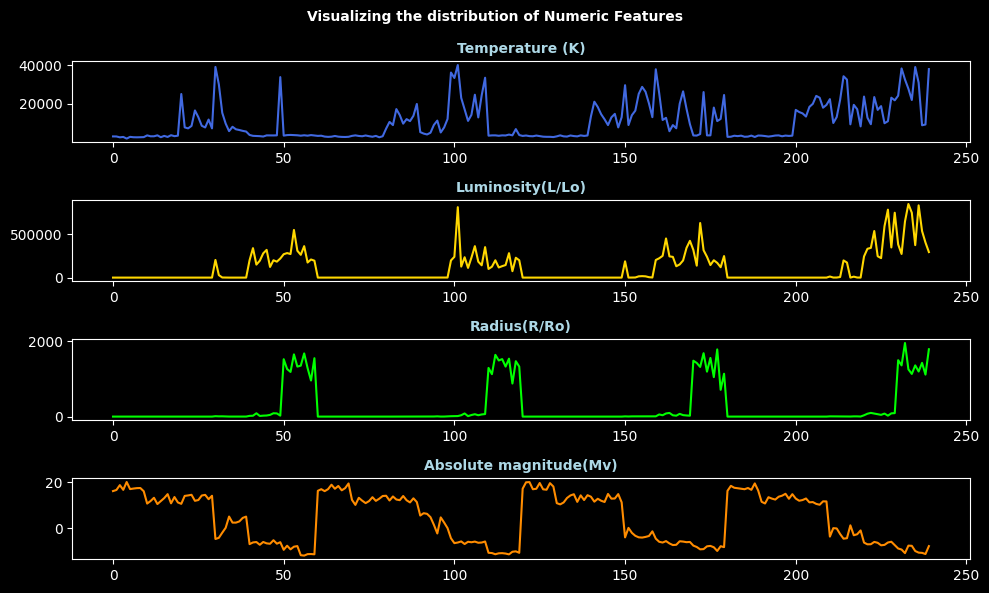

In [134]:
# line plot

plt.figure(figsize=(10,6))
colors = ['royalblue','gold','lime','darkorange']
plt.suptitle('Visualizing the distribution of Numeric Features',
             color='white',
             weight='bold',
             fontsize='10')
for i in range(4):
    line_subplot(star_df,colors,i)
plt.tight_layout()

plt.savefig(base_dir + 'line_plot.png')